# Построение гистограмм

Подключение библиотек

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.metrics import mean_absolute_error

Чтение таблицы из файла с помощью pandas

In [21]:
file_path = "D:\\AI\\HIstogram\\dataset_mental_report_new.xlsx"
data = pd.read_excel(file_path)

Вывод таблицы

In [22]:
data

,Unnamed: 0,num,marker_data_id,apway_id,context,person,gender,old,old_group,stroop_duration,...,HF_per,FR,SN,Q1,Q2,Q3,Q4,Q_common,adapt_risk,Q_edit
0,0,1,65787,1220_11316,Sofia,201,М,35,22_35,268,...,23.18,2.49,-1.03,100.0,0.0,0.0,0.0,Q1,1,0
1,1,2,65810,1226_11325,Sofia,105,М,56,36_60,836,...,74.89,0.47,1.74,0.0,78.4,21.6,0.0,Q2,6,0
2,2,3,66190,1242_11509,Sofia,106,М,60,36_60,602,...,26.65,-0.03,0.85,2.0,62.7,33.3,2.0,Q3,6,0
3,3,4,66519,1258_11745,Sofia,001test,Ж,23,22_35,136,...,5.84,-0.42,0.65,0.0,50.0,50.0,0.0,Q3,7,0
4,4,5,66555,1256_11772,Sofia,107,Ж,77,60_PLUS,472,...,70.93,0.66,2.08,0.0,100.0,0.0,0.0,Q2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,414,417,264116,5645_46265,1,eka4,Ж,60,36_60,253,...,33.03,0.36,1.56,0.0,68.8,31.2,0.0,Q2,6,0
415,415,418,264139,5623_46271,1,eka,Ж,29,22_35,139,...,22.11,-0.55,1.18,0.0,25.0,75.0,0.0,Q3,7,0
416,416,419,264233,5642_46347,1,eka3,Ж,45,36_60,236,...,15.65,1.24,0.88,0.0,100.0,0.0,0.0,Q2,5,0
417,417,420,264269,5623_46352,1,eka,Ж,29,22_35,128,...,31.79,1.02,0.67,0.0,100.0,0.0,0.0,Q2,5,0


Выбор только нужных данных

In [23]:
necessary = data[['gender','old']]
necessary.head()

,gender,old
0,М,35
1,М,56
2,М,60
3,Ж,23
4,Ж,77


Фильтрация данных и разделение по полу.(pandas)

In [24]:
men = necessary[necessary['gender']=='М']['old']
women = necessary[necessary['gender']=='Ж']['old']

Создание графиков (matplotlib)

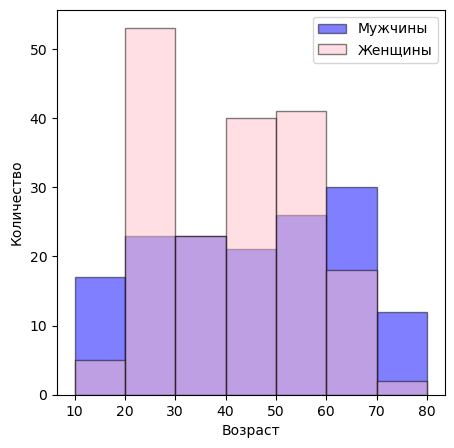

In [25]:
plt.figure(figsize=(5,5))
bins=[10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(men, bins=bins, alpha=0.5, label='Мужчины', color='blue', edgecolor='black')
#edgecolor- обводка столбцов bins- интервалы alpha- прозрачность
plt.hist(women, bins=bins, alpha=0.5, label='Женщины', color='pink', edgecolor='black')
plt.xlabel('Возраст')  
plt.ylabel('Количество')  
plt.legend(loc='upper right')  # Легенда


Построение графиков kdeplot(график плотности распределения) для мужчин и женщин
с помощью seaborn

<Axes: xlabel='old', ylabel='Density'>

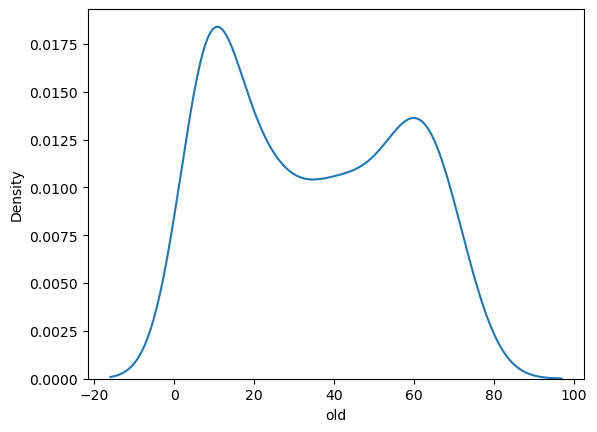

In [26]:
sns.kdeplot(men)

<Axes: xlabel='old', ylabel='Density'>

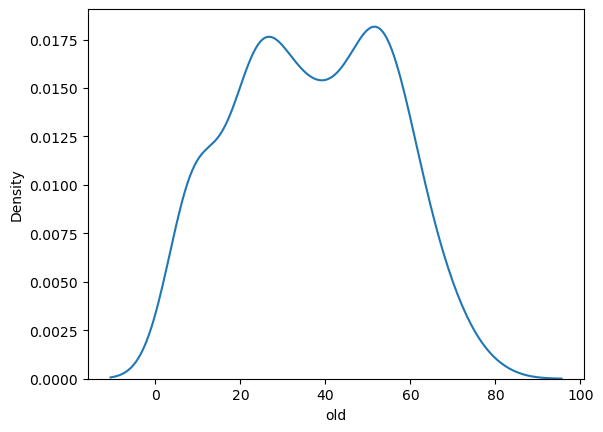

In [27]:
sns.kdeplot(women)

Построение графиков связи возраста с другими показателями

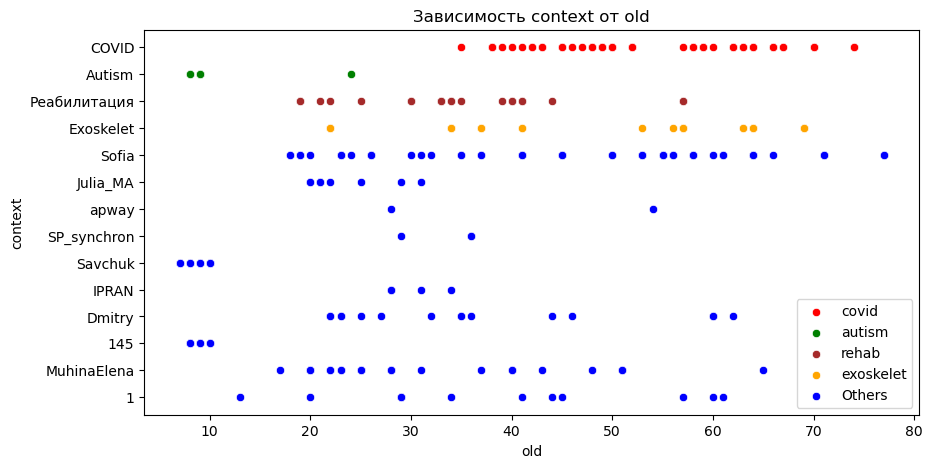

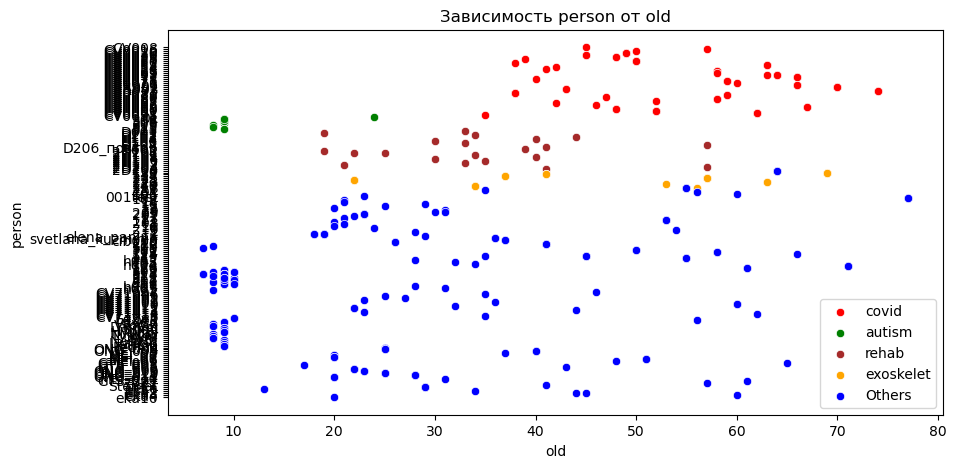

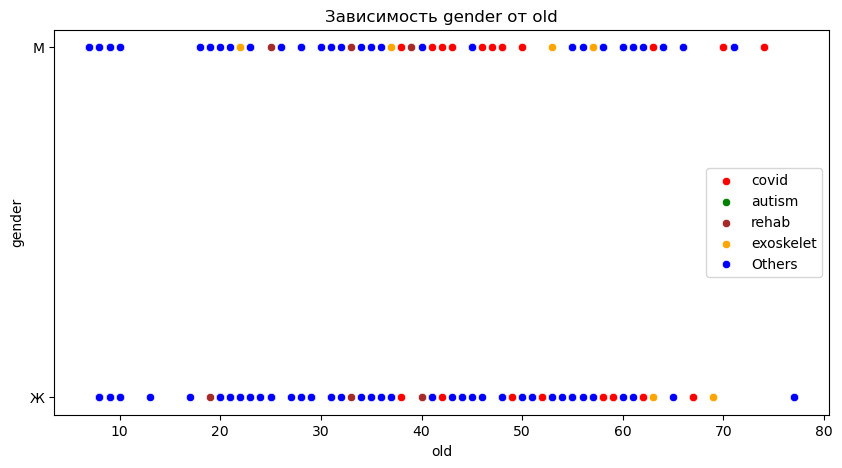

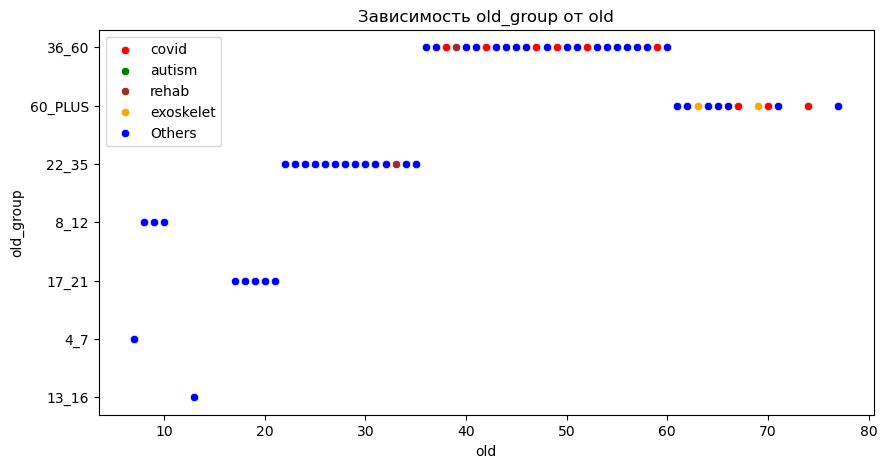

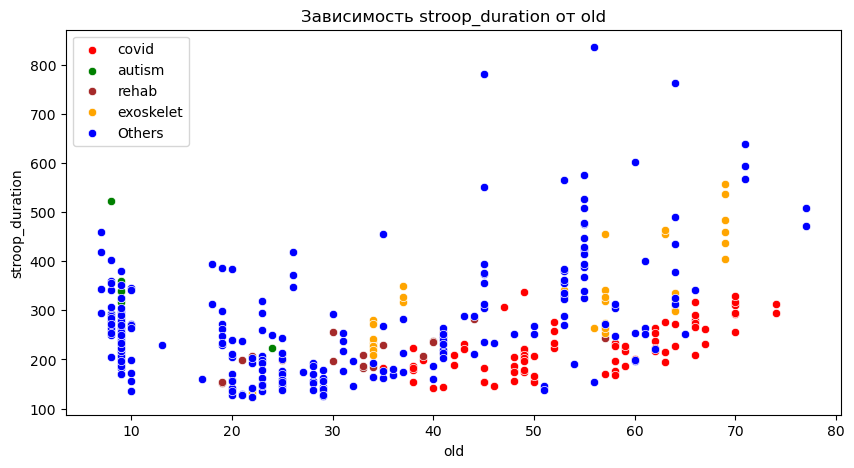

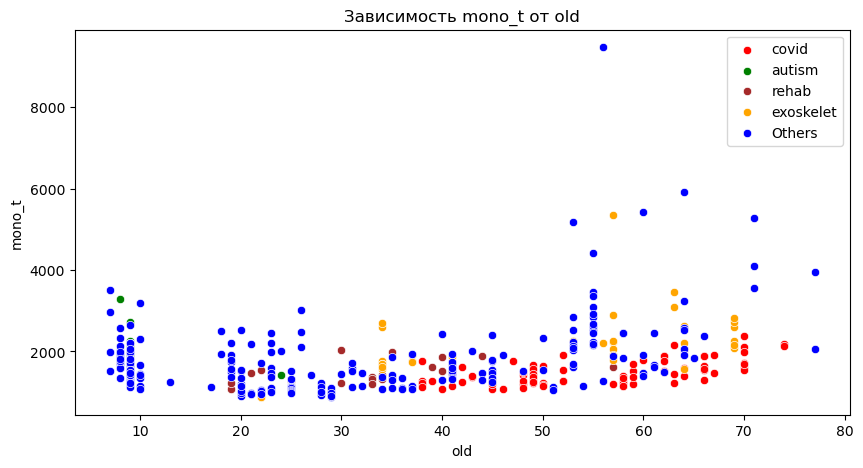

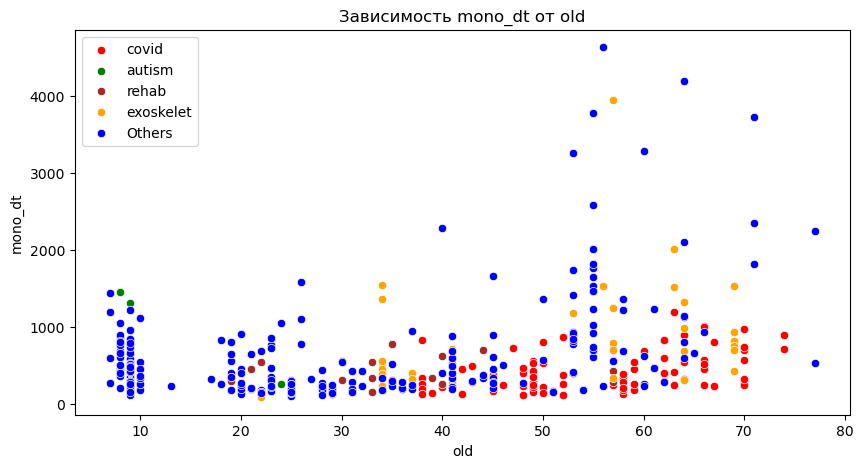

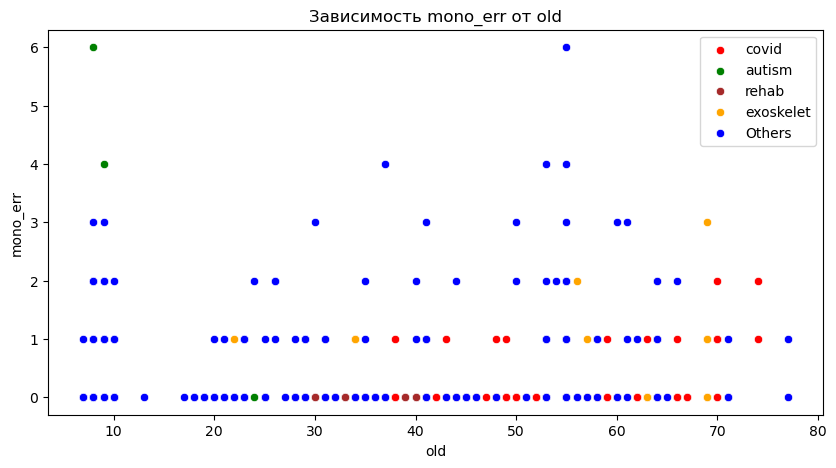

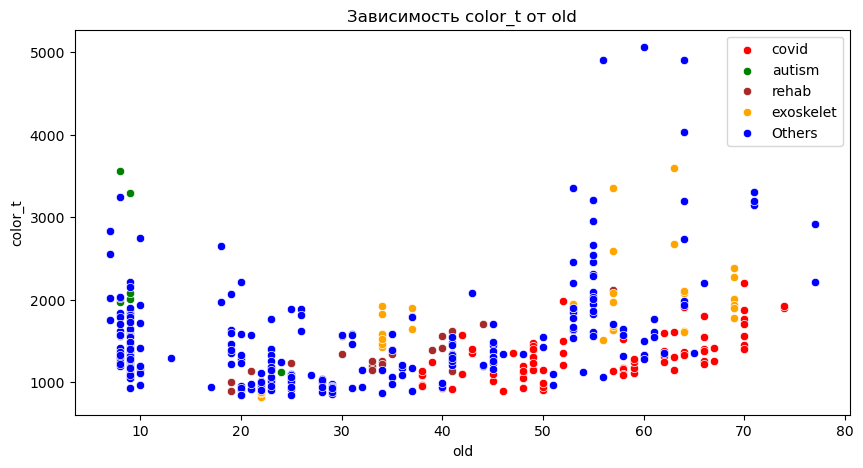

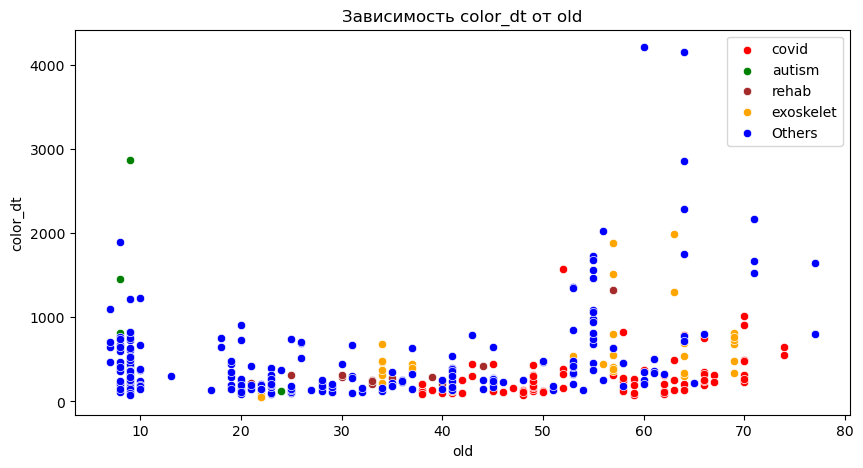

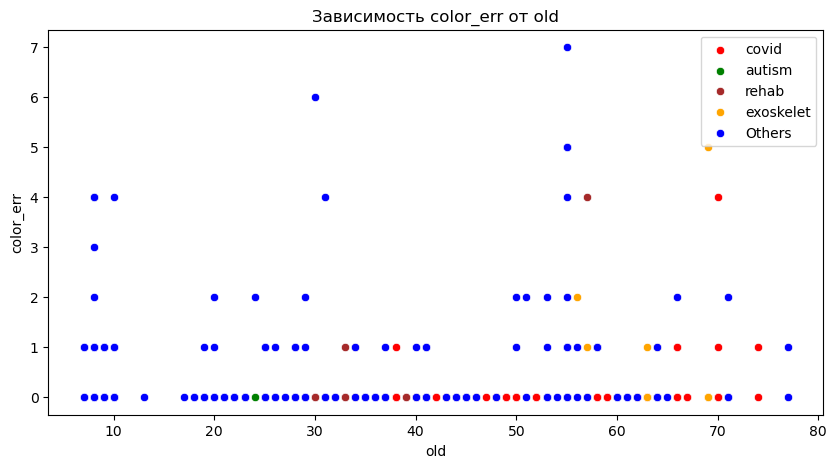

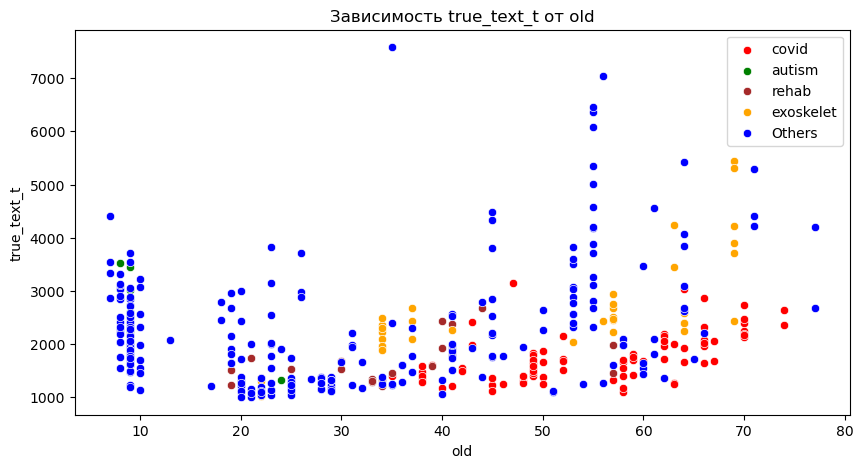

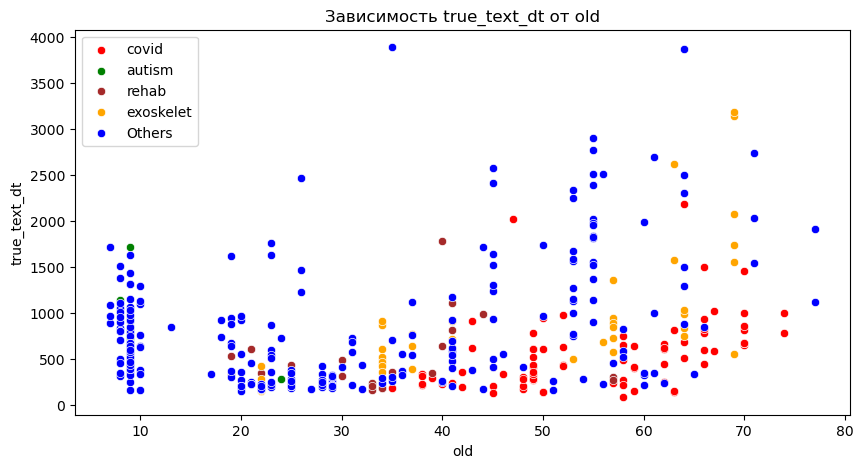

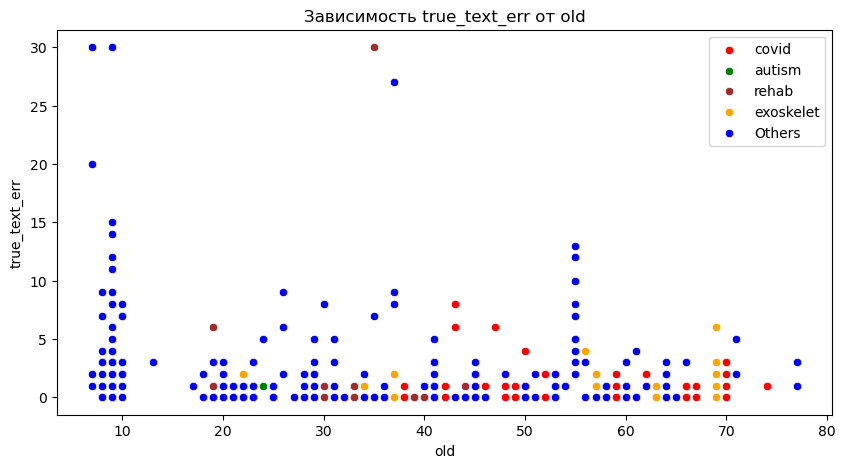

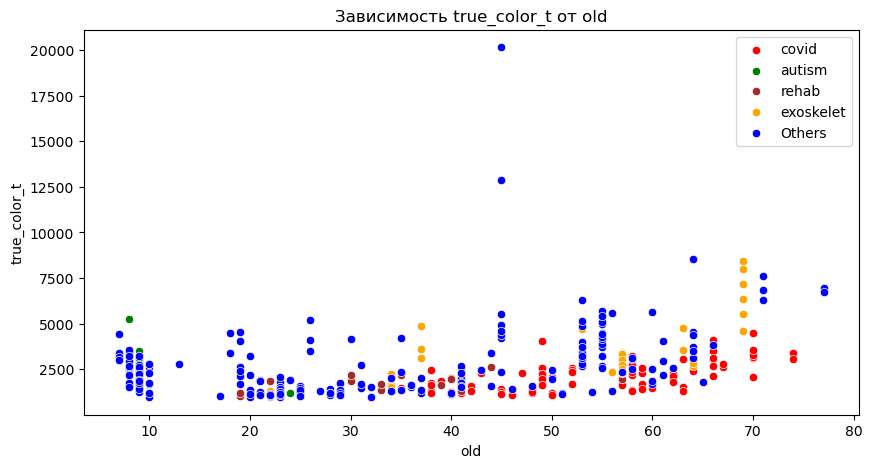

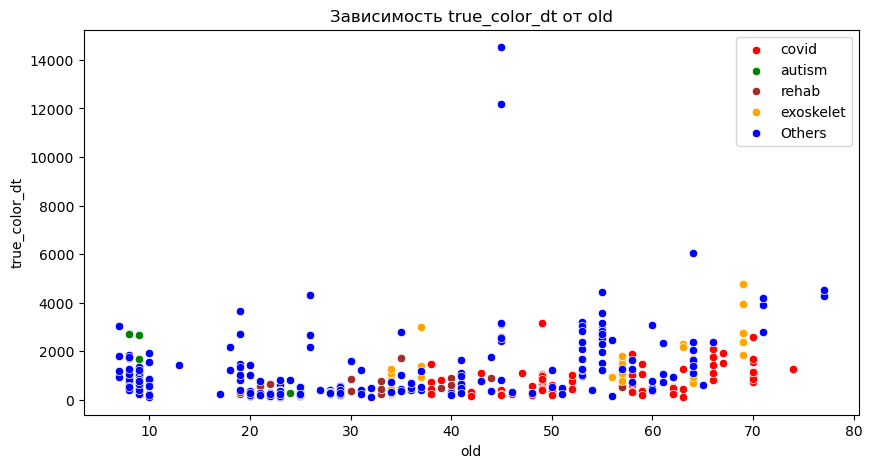

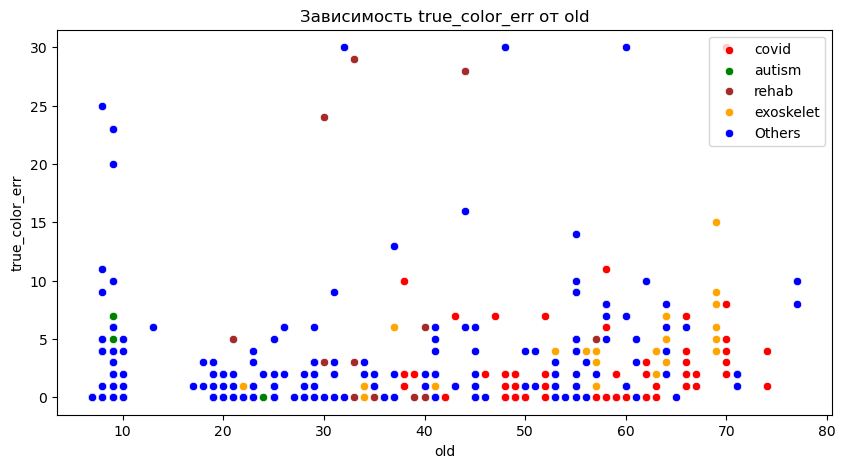

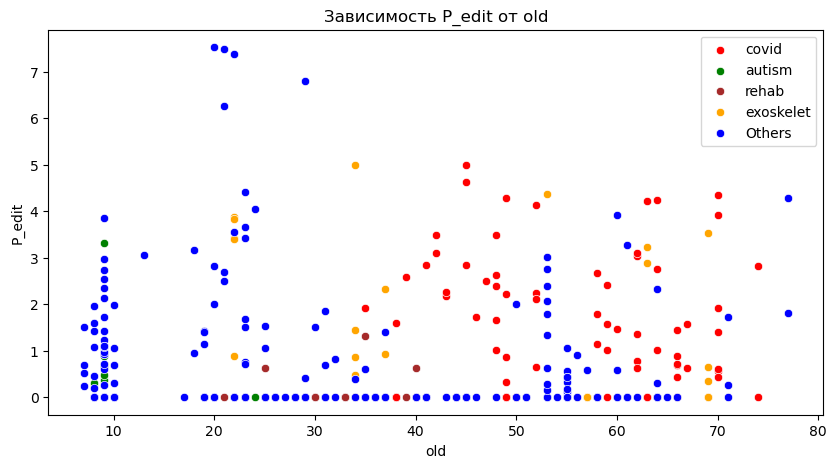

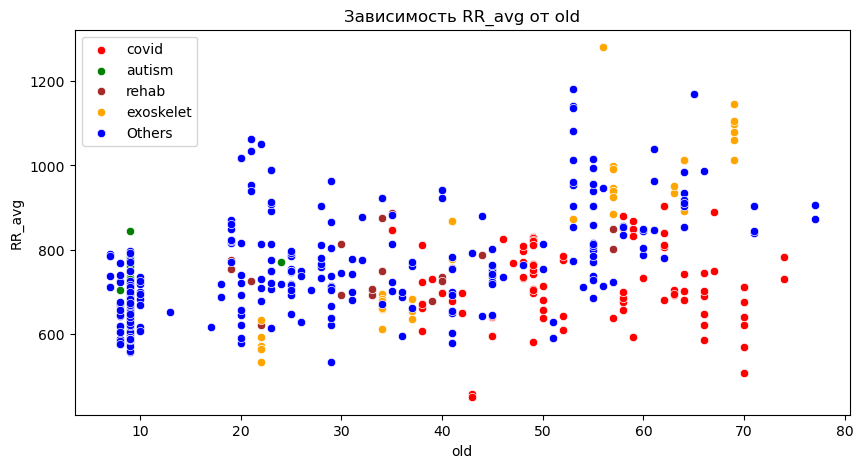

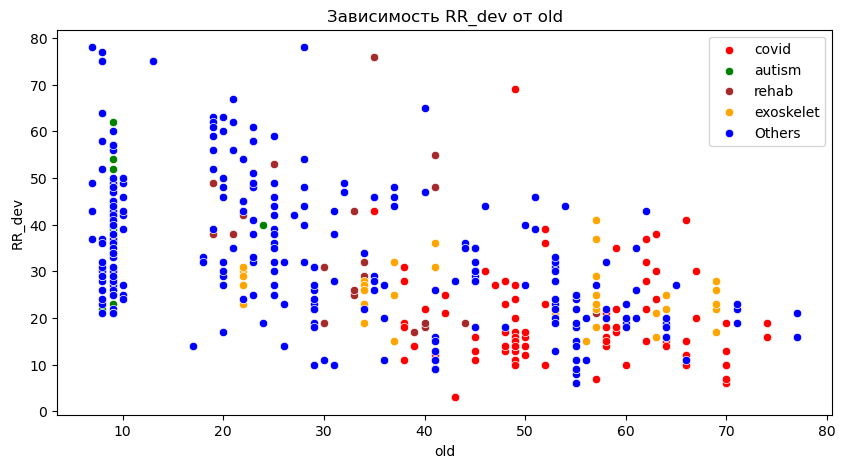

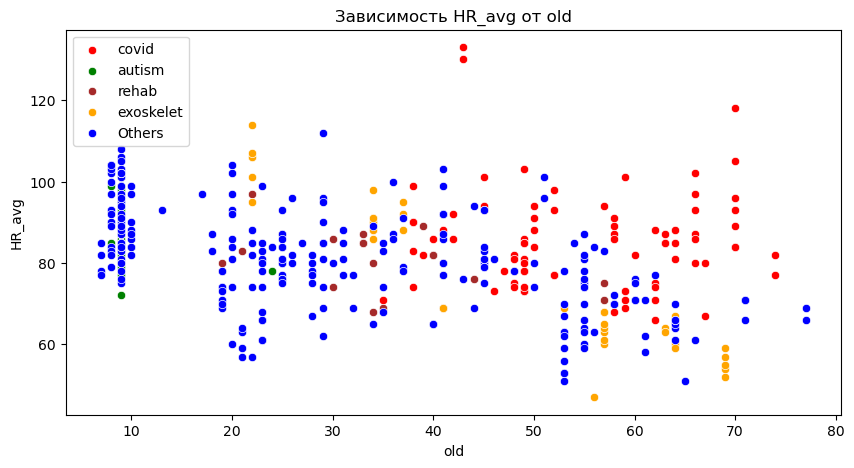

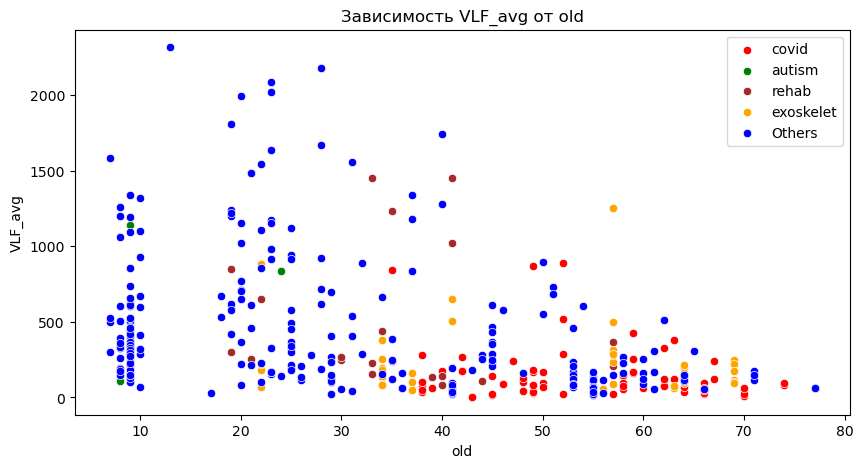

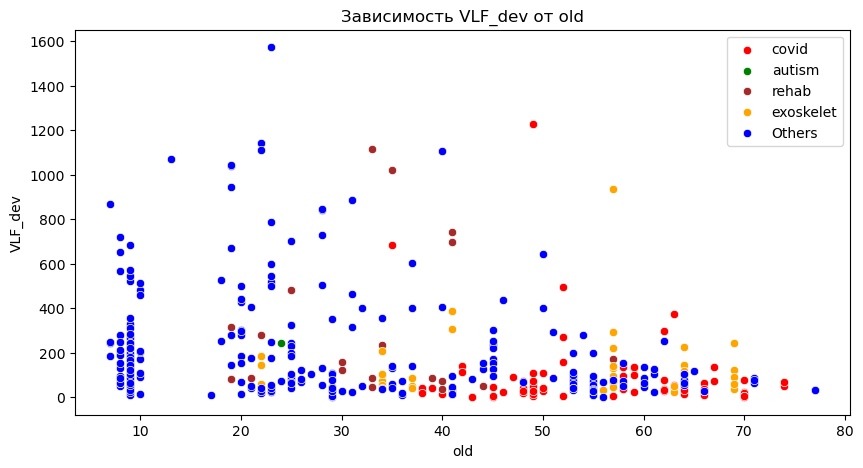

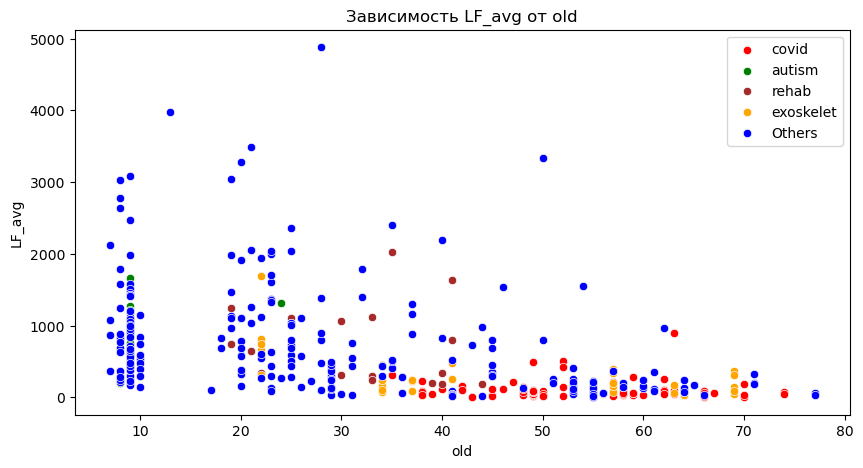

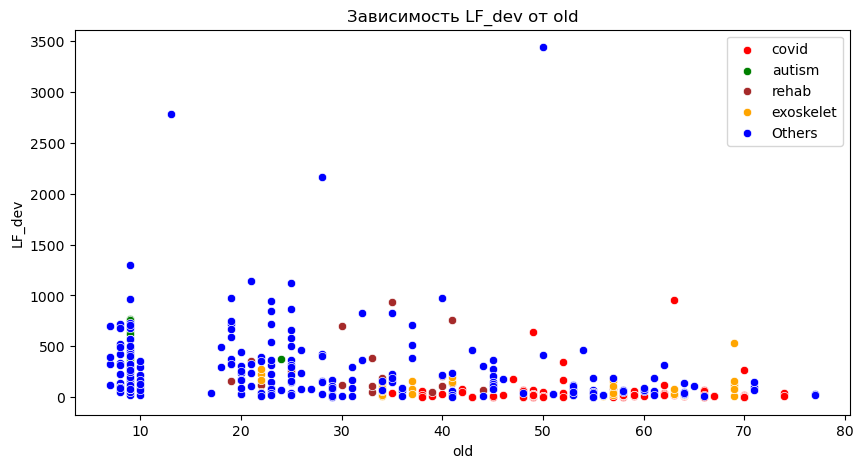

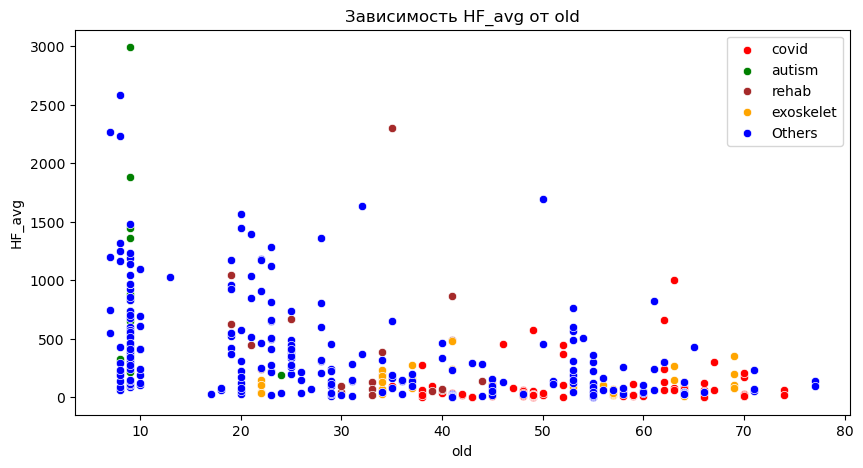

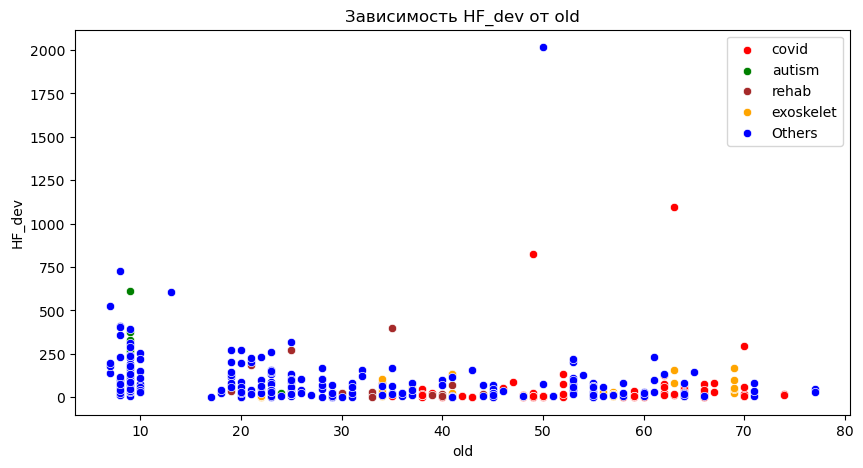

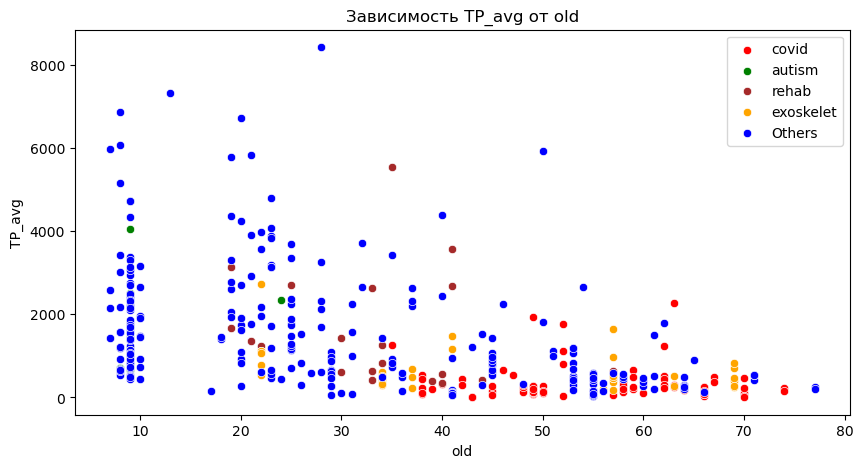

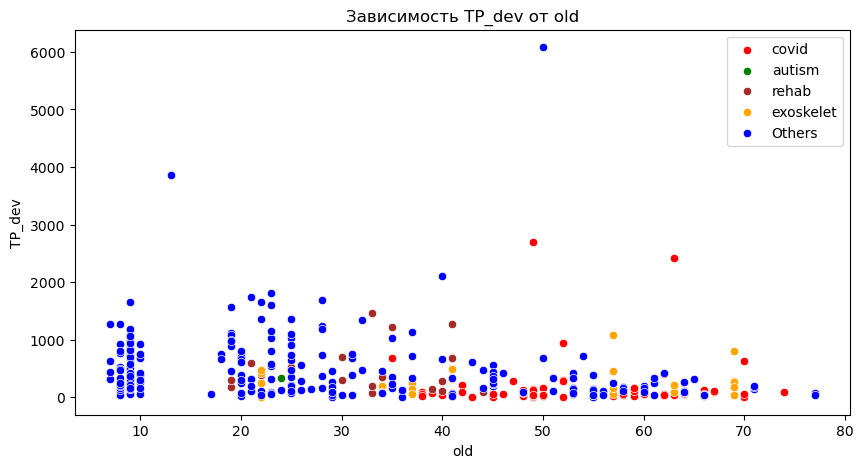

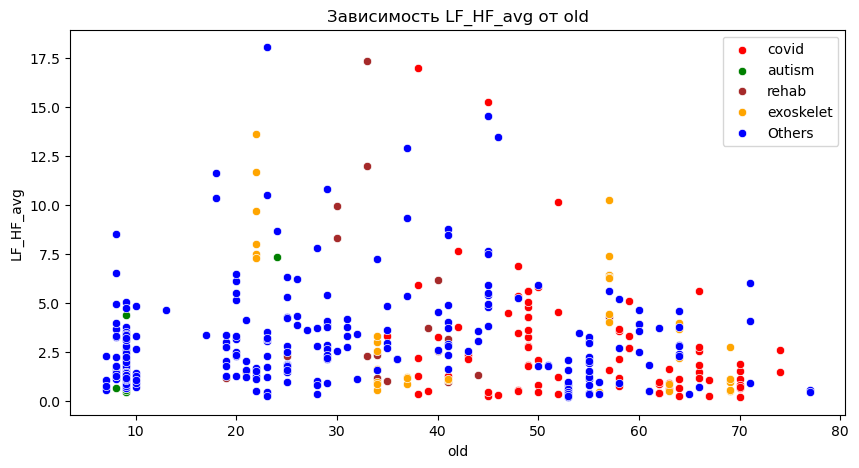

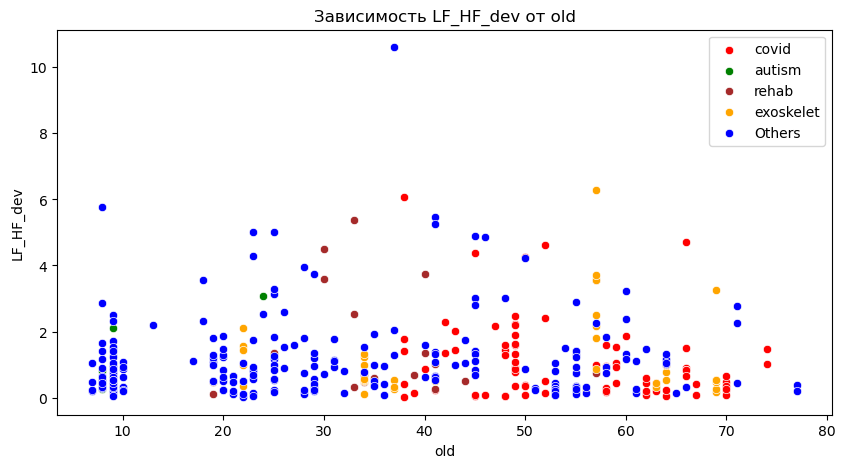

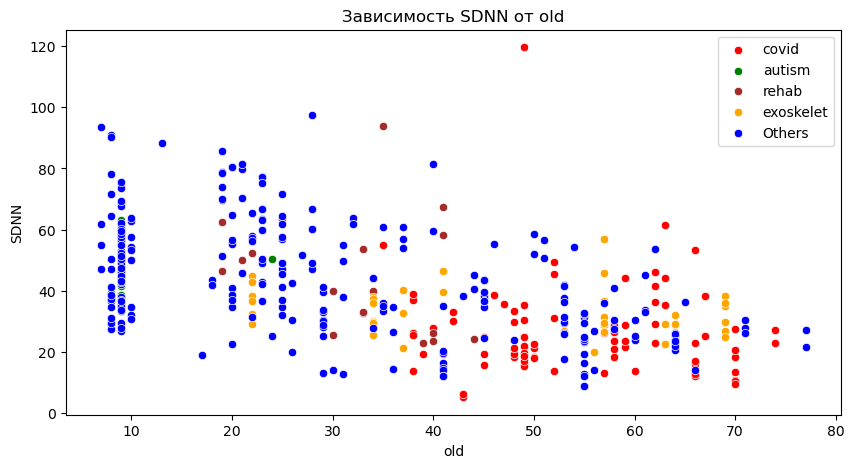

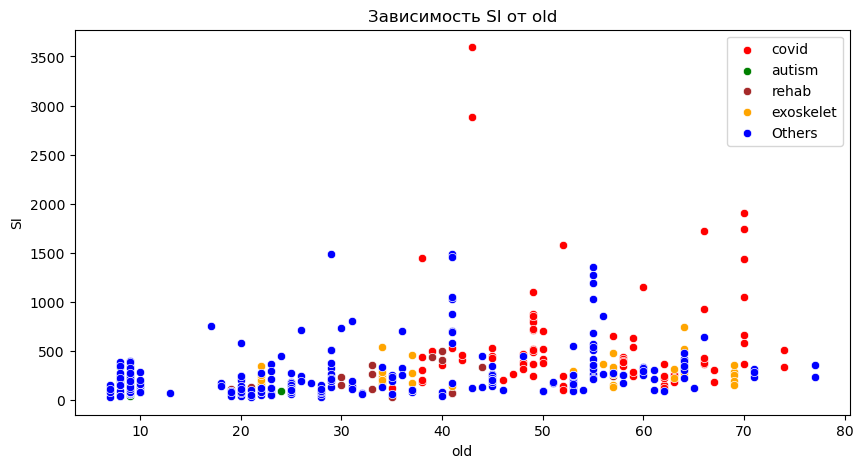

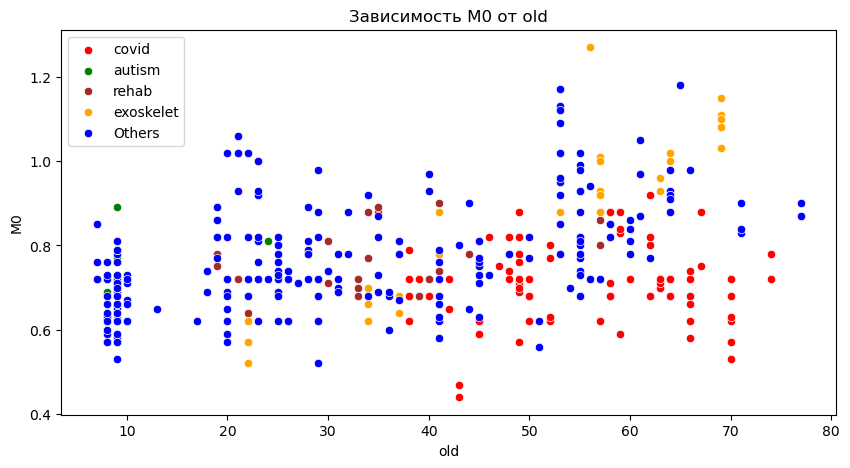

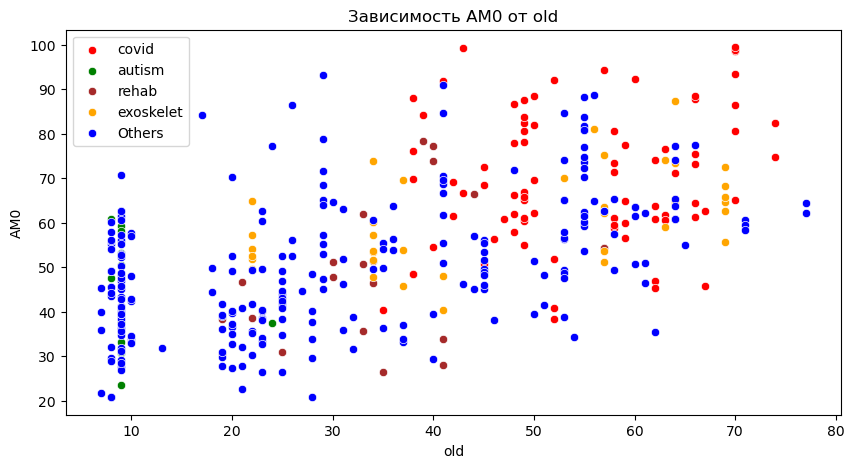

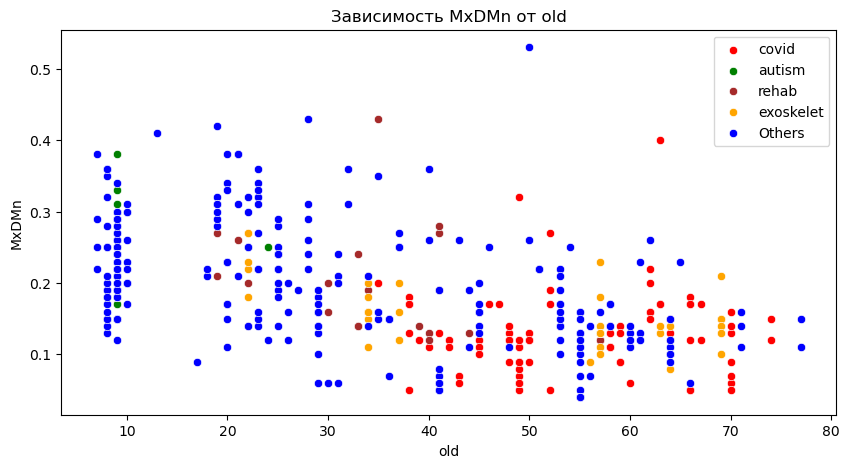

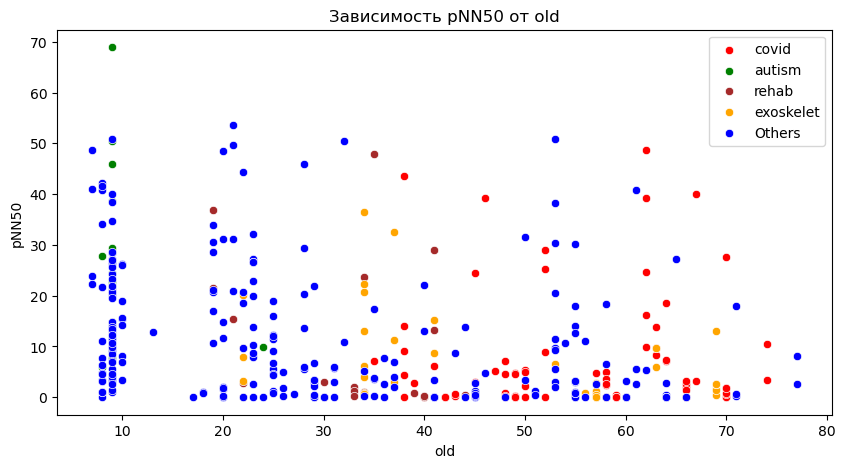

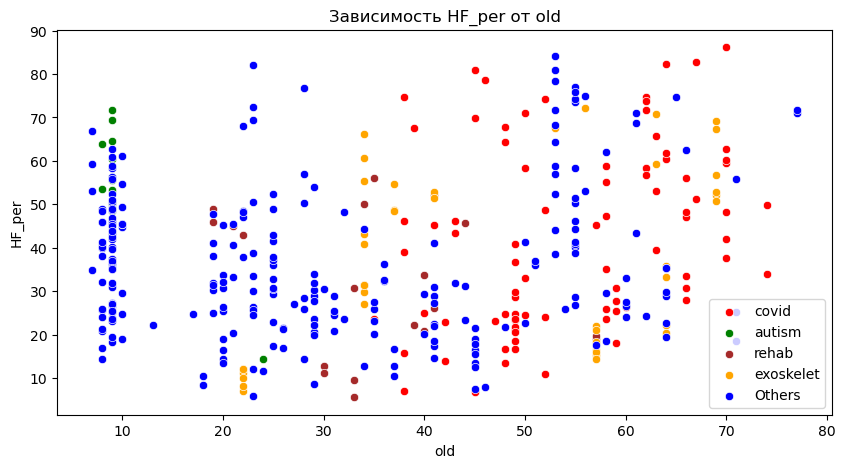

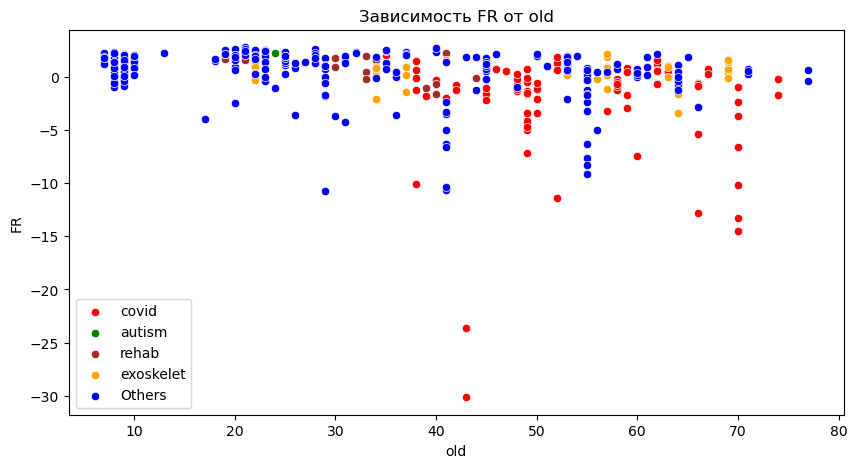

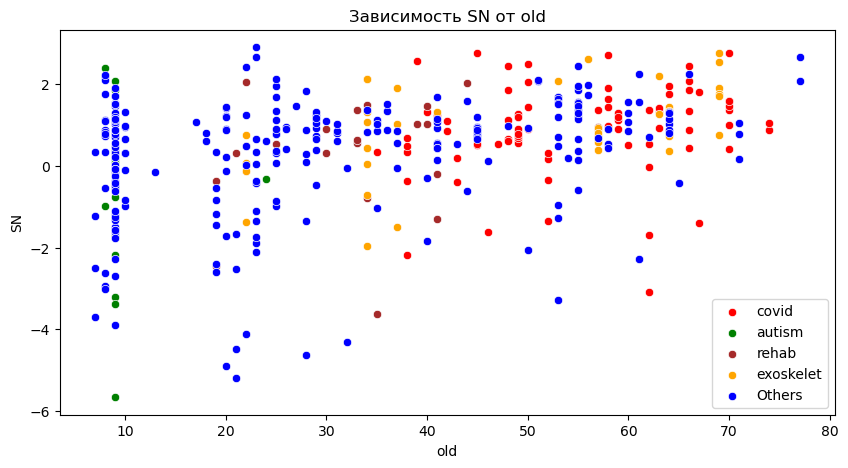

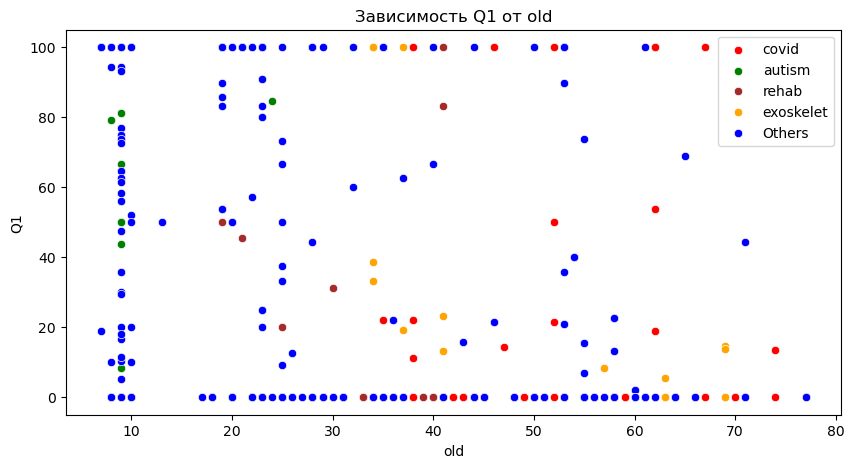

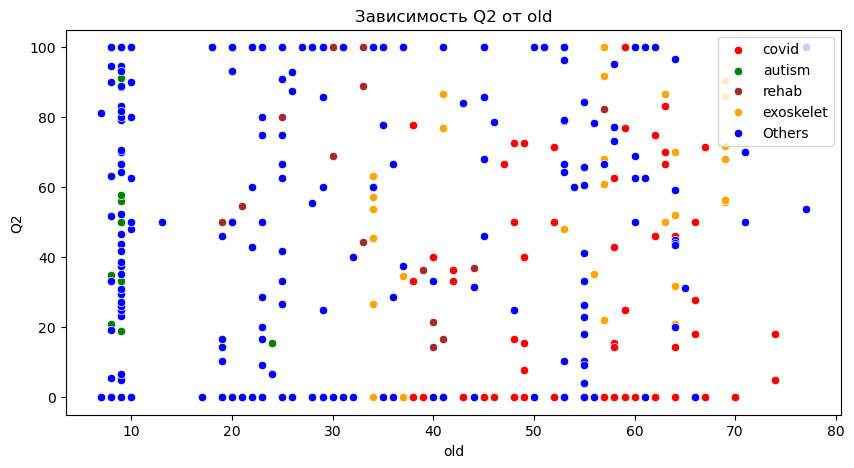

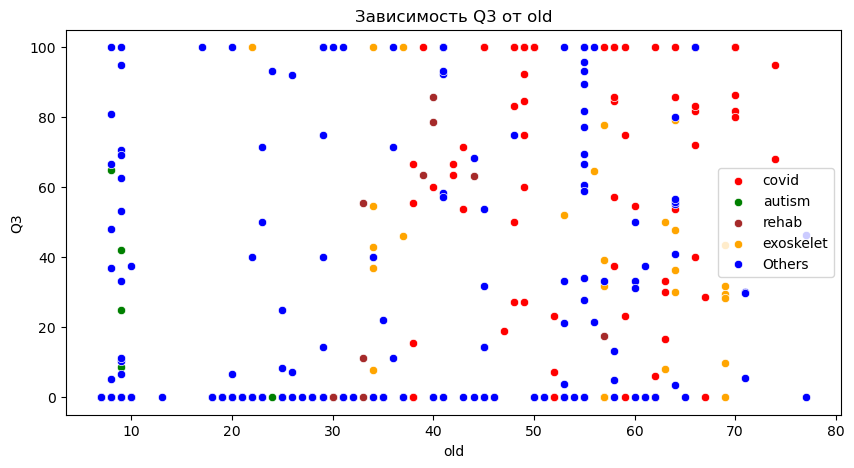

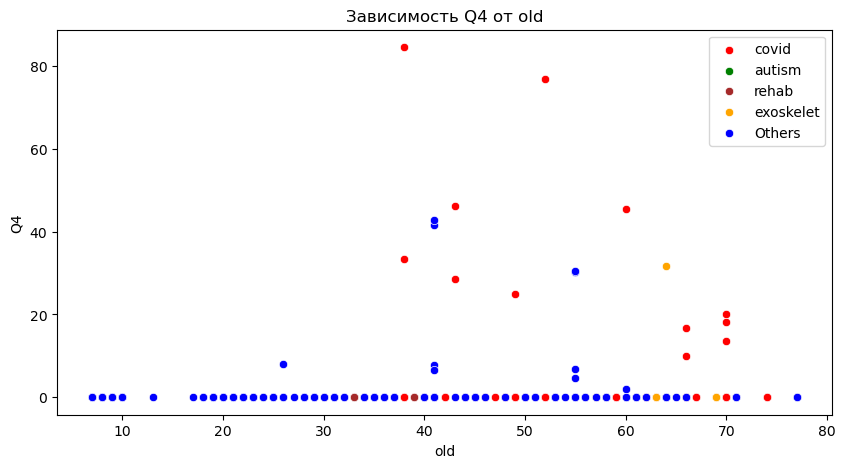

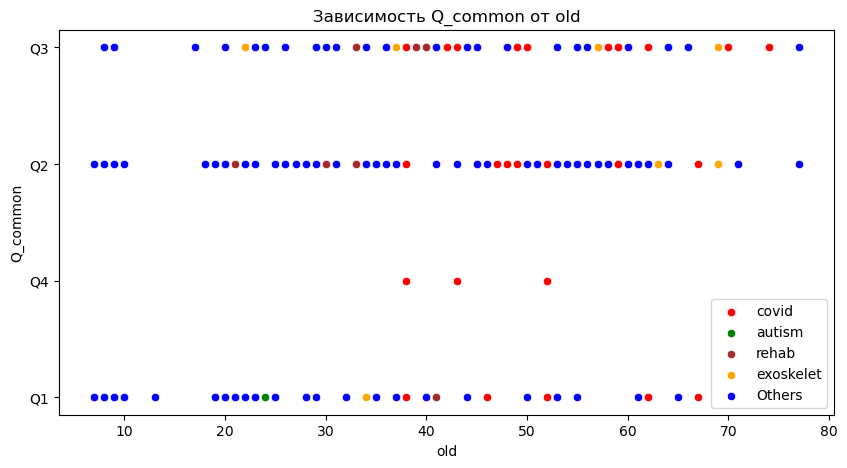

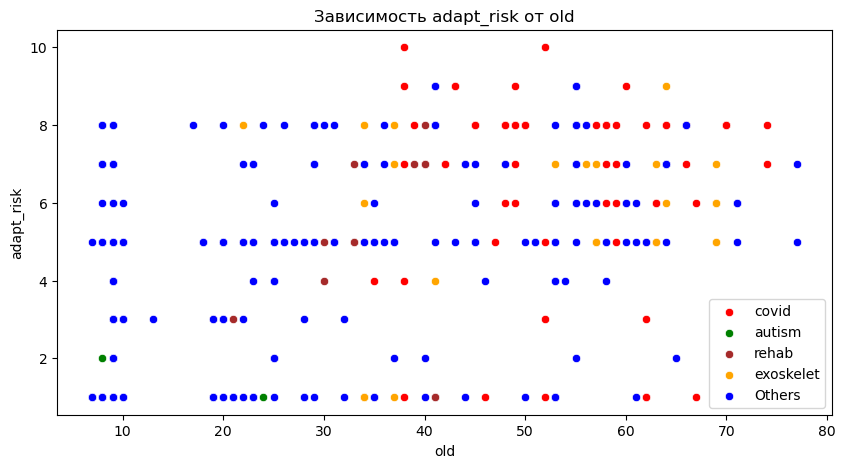

In [28]:
mask_covid = data['context'] == 'COVID'  #маски для фильтрации
mask_autism = data['context'] == 'Autism'
mask_rehab = data['context'] == 'Реабилитация'
mask_exoskelet = data['context'] == 'Exoskelet'

particular_column = 'old';
for i in range(4,len(data.columns)-1):
    if data.columns[i] != particular_column:
        plt.figure(figsize=(10,5))
        sns.scatterplot(data=data[mask_covid], x='old', y=data.columns[i],color='red',label='covid')
        sns.scatterplot(data=data[mask_autism], x='old', y=data.columns[i],color='green',label='autism')
        sns.scatterplot(data=data[mask_rehab], x='old', y=data.columns[i],color='brown',label='rehab')
        sns.scatterplot(data=data[mask_exoskelet], x='old', y=data.columns[i],color="orange",label='exoskelet')
        sns.scatterplot(data=data[~(mask_covid | mask_autism | mask_rehab | mask_exoskelet)], x='old', y=data.columns[i], color='blue', label='Others')
        plt.legend()
        plt.title(f'Зависимость {data.columns[i]} от {particular_column}')
        
        # Сохранение графика в файл
        column_number = str(i).zfill(2) # сохраниение номера в строку из 2 символов минимально
        plt.savefig(f'D:/AI/HIstogram/scatterplots/plot_{column_number}_{data.columns[i]}_vs_{particular_column}.png', format='png', dpi=300)
        plt.show()
        # Закрытие графика
        plt.close()
        


Функция создания таблицы с кореляциями (Кендала,Пирсона, Спирмана). Используется skipy


In [36]:
def calculate_correlations (data, particular_column, name_of_result_table):
    
    # Задаем столбцы для итоговой таблицы
    columns = ['Показатель', 'Корреляция Пирсона', 'Pearson p-value', 
               'Корреляция Спирмана', 'Spearman p-value', 
               'Корреляция Кендалла', 'Kendall p-value', 'Mae old от pc','Mae pc от old ', 'Тип данных']

    # Преобразование столбца particular_column в числовой формат
    data[particular_column] = pd.to_numeric(data[particular_column])
    
    # Создание пустой таблицы
    result_table = pd.DataFrame(columns=columns)
    
    # Перебор всех столбцов, начиная с 9-го и до предпоследнего
    for i in range(9, len(data.columns)-1):
        if data.columns[i] != 'Q_common':
            # Преобразование столбца в числовой формат
            data[data.columns[i]] = pd.to_numeric(data[data.columns[i]])
            
            # Вычисление корреляций и ошибки
            Pearson, Pear_p = pearsonr(data[particular_column], data[data.columns[i]])
            Spearman, Spear_p = spearmanr(data[particular_column], data[data.columns[i]])
            Kendall, Ken_p = kendalltau(data[particular_column], data[data.columns[i]])
            Mae1 = mean_absolute_error(data[particular_column], data[data.columns[i]])
            Mae2 = mean_absolute_error(data[data.columns[i]], data[particular_column]) #добавил обратныей mae
            
            # Добавление строки с результатами в таблицу
            result_table.loc[i-9] = [data.columns[i], Pearson, Pear_p, Spearman, Spear_p, 
                                     Kendall, Ken_p, Mae1, Mae2, 'continious']
    
    # Изменение типа данных на 'discret' для определенных показателей
    discret = ['mono_err', 'color_err', 'true_text_err', 'true_color_err', 'adapt_risk']
    result_table.loc[result_table['Показатель'].isin(discret), 'Тип данных'] = 'discret'
    
    # Сортировка таблицы по корреляции Пирсона pandas
    result_table_sorted = result_table.sort_values(by='Корреляция Пирсона', ascending=False)
    result_table_sorted = result_table_sorted.reset_index(drop=True) #сброс индексов
    
    # Разделение на таблицы с положительной и отрицательной корреляцией
    positive_corr_table = result_table_sorted[result_table_sorted['Корреляция Пирсона'] >= 0]
    negative_corr_table = result_table_sorted[result_table_sorted['Корреляция Пирсона'] < 0]
    
    #сортировка negative cor в порядке от большего к меньшему
    negative_corr_table = negative_corr_table.sort_values(by='Корреляция Пирсона', ascending=True)
    negative_corr_table = negative_corr_table.reset_index(drop=True) #сброс индексов
    
    # Сохранение результатов в Excel pandas
    with pd.ExcelWriter(name_of_result_table) as writer:
        positive_corr_table.to_excel(writer, sheet_name='Positive Correlation', index=False)
        negative_corr_table.to_excel(writer, sheet_name='Negative Correlation', index=False)
        result_table_sorted.to_excel(writer, sheet_name='General', index=False)
    
    # Настройка ширины таблицы и вывод на экран
    pd.set_option('display.width', 130)
    #print(result_table_sorted)
    return result_table_sorted




Общая таблица

In [37]:
general_table = calculate_correlations (data, particular_column, 'general table.xlsx')

Таблица для мужчин

In [38]:
men_data=data[data['gender']=='М'].copy()# создание таблицы с данными только мужчин copy чтоб не изменялась data и не было предупреждений
men_table = calculate_correlations (men_data, particular_column, 'men table.xlsx')


Таблица для женщин

In [39]:
women_data=data[data['gender']=='Ж'].copy()# создание таблицы с данными только мужчин cope чтоб не изменялась data и не было предупреждений

women_table = calculate_correlations (women_data, particular_column, 'women table.xlsx')

Создание агрегированной таблицы

In [53]:
columns = ['Показатель', 'Кор Спирмана для мужчин', 'Кор Спирмана для женщин', 'Кор Спирмана для всех']
agg_tab = pd.DataFrame(columns=columns)

agg_tab['Показатель'] = general_table['Показатель']
agg_tab['Кор Спирмана для мужчин'] = men_table['Корреляция Спирмана']
agg_tab['Кор Спирмана для женщин'] = women_table['Корреляция Спирмана']
agg_tab['Кор Спирмана для всех'] = general_table['Корреляция Спирмана']

# Сортировка таблицы по общей корреляции pandas
agg_table_sorted = agg_tab.sort_values(by='Кор Спирмана для всех', ascending=False)
   
# Разделение на таблицы с положительной и отрицательной корреляцией
positive_agg_table = agg_table_sorted[agg_table_sorted['Кор Спирмана для всех'] >= 0]
negative_agg_table = agg_table_sorted[agg_table_sorted['Кор Спирмана для всех'] < 0]
    
#сортировка negative cor в порядке от большего к меньшему
negative_agg_table = negative_agg_table.sort_values(by='Кор Спирмана для всех', ascending=True)
   
# Сохранение результатов в Excel pandas
with pd.ExcelWriter('aggregated table.xlsx') as writer:
    positive_agg_table.to_excel(writer, sheet_name='Positive Correlation', index=False)
    negative_agg_table.to_excel(writer, sheet_name='Negative Correlation', index=False)
    agg_table_sorted.to_excel(writer, sheet_name='General', index=False)

